# Introduction

Welcome to this project analyzing crime data from Los Angeles, California, known as the "City of Angels." 🌴✨

Los Angeles is famous for its sunny weather, palm trees, and entertainment industry. However, like any major city, it also faces challenges, including a high crime rate. This project aims to explore a crime dataset to identify patterns in criminal behavior and provide valuable insights to the Los Angeles Police Department (LAPD).

By analyzing the `crimes.csv` file, we will address the following questions:

- **Which hour has the highest frequency of crimes?** 
- **Which area has the largest frequency of night crimes (crimes committed between 10 PM and 3:59 AM)?** 
- **What is the number of crimes committed against victims of different age groups?** 

These analyses will assist the LAPD in effectively allocating resources to tackle crime in various areas. Let’s dive into the data!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("Dataset/crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [2]:
crimes.shape

(185715, 12)

## 1. Which hour has the highest frequency of crimes?

To achieve this, we need to retain only the first two elements from each row in the 'TIME OCC' column, as we have already transformed this column into a string type.

In [3]:
hour_crimes = crimes["TIME OCC"].str[:2]

In [4]:
hour_crimes = hour_crimes

In [5]:
hour_crimes_count = hour_crimes.value_counts()

In [6]:
hour_crimes_count

TIME OCC
12    13663
18    10125
17     9964
20     9579
15     9393
19     9262
16     9224
14     8872
11     8787
00     8728
21     8701
22     8531
13     8474
10     8440
08     7523
23     7419
09     7092
01     5836
06     5621
07     5403
02     4726
03     3943
04     3238
05     3171
Name: count, dtype: int64

but its more clear with frequency 

In [7]:
hour_crimes = pd.to_numeric(hour_crimes)

In [8]:
hour_crimes

0         11
1         16
2         12
3          6
4          9
          ..
185710    11
185711    18
185712    10
185713    16
185714     9
Name: TIME OCC, Length: 185715, dtype: int64

In [9]:
total_counts = hour_crimes.value_counts().sum()

In [10]:
total_counts

185715

In [11]:
percentage_crimes = (hour_crimes_count / total_counts) * 100

In [12]:
percentage_crimes

TIME OCC
12    7.356972
18    5.451902
17    5.365210
20    5.157903
15    5.057750
19    4.987212
16    4.966750
14    4.777212
11    4.731443
00    4.699674
21    4.685136
22    4.593598
13    4.562906
10    4.544598
08    4.050831
23    3.994831
09    3.818755
01    3.142449
06    3.026681
07    2.909297
02    2.544759
03    2.123146
04    1.743532
05    1.707455
Name: count, dtype: float64

In [13]:
percentage_crimes.sum()

100.0

It is observed that the highest frequency of offenses occurs at 12 AM, accounting for 7% of all recorded incidents. Conversely, the lowest frequency is noted at 5 AM, representing only 1.7% of the total offenses.

### 2. Which area has the largest frequency of night crimes (crimes committed between 10 PM and 3:59 AM)?

In [14]:
crimes["TIME OCC"]

0         1110
1         1620
2         1200
3         0635
4         0900
          ... 
185710    1100
185711    1800
185712    1000
185713    1630
185714    0900
Name: TIME OCC, Length: 185715, dtype: object

We want to cover all nighttime hours, including those between 10:00 PM and 11:59 PM (2200 : 2359), as well as those between 12:00 AM and 3:59 AM (0000 : 0359).

In [15]:
night_times_crimes = crimes[
    (crimes["TIME OCC"].between("2200", "2359")) | (crimes["TIME OCC"].between("0", "0359"))
]


In [16]:
night_times_crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
8,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV
10,221711184,2022-06-15,2020-05-15,0155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV
30,221314362,2022-07-11,2020-04-07,0001,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY
36,221614254,2022-11-13,2020-01-01,0001,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV


In [17]:
night_times_crimes.shape

(39183, 12)

We have a total of 39,183 night crimes recorded in the dataset globally.

In [18]:
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION'],
      dtype='object')

In [19]:
crimes['AREA NAME'].unique()

array(['Southwest', 'Olympic', 'Hollywood', '77th Street', 'Rampart',
       'N Hollywood', 'Mission', 'Devonshire', 'Central', 'Wilshire',
       'Newton', 'Northeast', 'Van Nuys', 'Hollenbeck', 'West Valley',
       'Foothill', 'Topanga', 'Southeast', 'Pacific', 'West LA', 'Harbor'],
      dtype=object)

In [20]:
crimes["AREA NAME"].value_counts(normalize=True)*100

AREA NAME
Central        8.046738
Southwest      6.431898
77th Street    6.320976
Pacific        5.343133
Hollywood      5.256441
Southeast      5.153596
Olympic        5.069057
Newton         4.927981
Van Nuys       4.642059
N Hollywood    4.577982
Wilshire       4.567213
Topanga        4.565059
Rampart        4.493983
West Valley    4.362599
West LA        4.259753
Northeast      4.107369
Devonshire     3.990523
Mission        3.763832
Harbor         3.563525
Hollenbeck     3.334679
Foothill       3.221603
Name: proportion, dtype: float64

It can be observed that the majority of nighttime crimes occur in the central area, accounting for 8% of the total.

### 3. What is the number of crimes committed against victims of different age groups?

We analyze the minimum and maximum ages in the dataset to adjust the bins and ensure that they are organized into appropriate age groups , then, we will create a new column to add the age groups.

In [21]:
crimes["Vict Age"].min()

2

In [22]:
crimes["Vict Age"].max()

99

In [23]:
bins = [2, 12, 19, 35, 60, 101]  
labels = ['Children', 'Teenagers', 'Young Adults', 'Adults', 'Seniors']


In [24]:
crimes["Vict Age"]

0         27
1         60
2         28
3         37
4         79
          ..
185710    25
185711    23
185712    25
185713    29
185714    53
Name: Vict Age, Length: 185715, dtype: int64

In [25]:
crimes["Vict Age Group"] = pd.cut(crimes["Vict Age"], bins=bins, labels=labels, right=False)


In [26]:
crimes["Vict Age Group"]

0         Young Adults
1              Seniors
2         Young Adults
3               Adults
4              Seniors
              ...     
185710    Young Adults
185711    Young Adults
185712    Young Adults
185713    Young Adults
185714          Adults
Name: Vict Age Group, Length: 185715, dtype: category
Categories (5, object): ['Children' < 'Teenagers' < 'Young Adults' < 'Adults' < 'Seniors']

In [27]:
crimes["Vict Age Group"].value_counts()

Vict Age Group
Adults          81545
Young Adults    74309
Seniors         23881
Teenagers        5151
Children          829
Name: count, dtype: int64

In [28]:
crimes["Vict Age Group"].value_counts(normalize = True )*100

Vict Age Group
Adults          43.908677
Young Adults    40.012385
Seniors         12.858951
Teenagers        2.773605
Children         0.446383
Name: proportion, dtype: float64

We obtain this age distribution expressed as a percentage.

In [37]:
age_distribution = {
    'Adults (35 - 60)': 43.908677,
    'Young Adults (20 - 35)': 40.012385,
    'Seniors (60 - 101)': 12.858951,
    'Teenagers (12 - 19)': 2.773605,
    'Children (2 - 12)': 0.446383
}

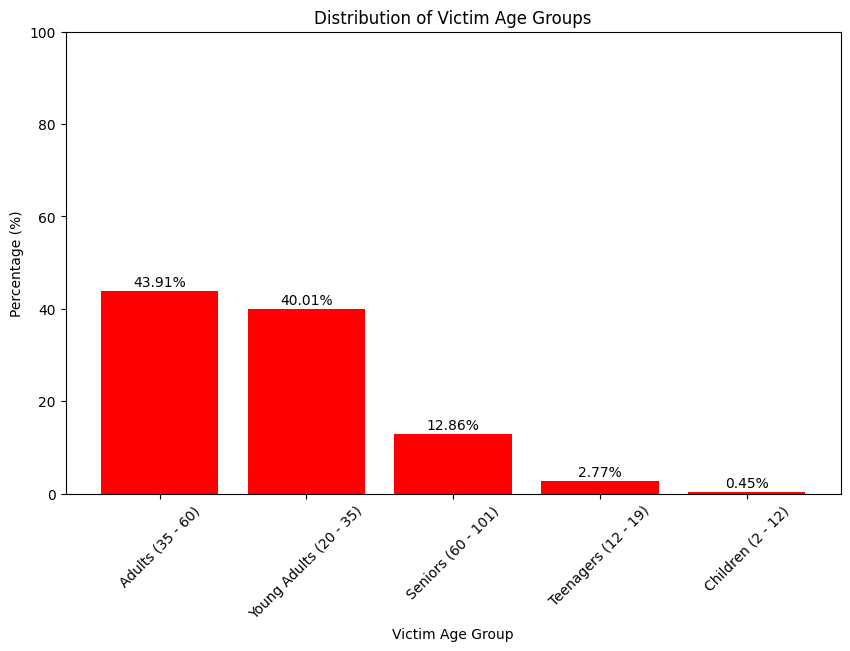

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(age_distribution.keys(), age_distribution.values(), color='red')
plt.title('Distribution of Victim Age Groups')
plt.xlabel('Victim Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  
plt.ylim(0, 100)  

for i, v in enumerate(age_distribution.values()):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.show()